<a href="https://colab.research.google.com/github/joaquinvvelaco/diplo-datos-2022/blob/main/ayvd/entregables/Grupo_29_Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy.stats as st
from math import sqrt

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona *este* intervalo de confianza con el test de hipótesis?

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


# Actividades del Grupo 29

## Resolución ejercicio 1




### Funciones de filtrado

#### Funciones genéricas
_Estas funciones van a aplicar las máscaras o filtros definidos en las siguientes subsecciones.Las mismas ya fueron utilizadas en la parte 1_

In [ ]:
# Funciones genéricas
def preprocess_dataset(dataset, masks):
  return filter(dataset, masks)

def filter(dataset, masks):
  filters = get_filter(dataset, masks)
  return dataset[filters]

def get_filter(dataset, masks):
  filters = np.full((len(dataset),), True)
  for mask in masks:
    filters &= mask
  return filters

#### Funciones para el filtrado inicial
_Funciones para generar máscaras o filtros. Las mismas ya fueron utilizadas en la parte 1_

In [ ]:

# Funciones para generar máscaras de filtrado
def mask_for_clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return mask_outlier

def mask_for_clean_outliers_q3_multiple(dataset, column_names):
  """Returns dataset removing the outlier rows from one or multiple columns"""
  if type(column_names) is str:
    return mask_for_clean_outliers_q3(dataset, column_names)
  else:
    masks = [
            mask_for_clean_outliers_q3(dataset, column_name)
            for column_name in column_names
            ]
    return get_filter(dataset, masks)
    
def calc_iqr(dataset, column_name):
  """Returns interquartile range of a dataset"""
  q1 = dataset[column_name].quantile(0.25)
  q3 = dataset[column_name].quantile(0.75)
  return q1, q3, q3 - q1

def mask_for_clean_outliers(dataset, column_name):
  """Returns dataset removing the outlier rows from column @column_name.
  References: 
  [1] https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097
  [2] http://www.cs.uni.edu/~campbell/stat/normfact.html
  """
  iqr = calc_iqr(dataset, column_name)
  lower_bound = iqr[0] - 1.5 * iqr[2]  # Q1 - 1.5 * IQR 
  upper_bound = iqr[1] + 1.5 * iqr[2]  # Q3 + 1.5 * IQR

  interest_col = dataset[column_name]
  
  mask_outlier = ((interest_col >= lower_bound) & (interest_col <= upper_bound))
  
  return mask_outlier
def mask_for_remove_work_contract_type_different_to(dataset, work_contract_type):
  return (dataset.work_contract_type == work_contract_type)

def mask_for_remove_noninteresting_languages(dataset, interesting_languages):
  return dataset.programming_language.isin(interesting_languages)

def mask_for_remove_usd_salary(dataset, max_usd_salary):
  return ~((dataset.salary_monthly_NETO < max_usd_salary) & (~(dataset.salary_in_usd.isna())))

def mask_for_remove_thousand_sep_error(dataset):
  return (dataset.salary_monthly_NETO > 1000)


# Hacemos el primer filtrado de los datos
def filtrado_de_datos(dataset, outlier_cols):
  mask_preprocess = [
    mask_for_remove_work_contract_type_different_to(dataset, "Full-Time"),
    mask_for_remove_thousand_sep_error(dataset),
    mask_for_remove_usd_salary(dataset, 10000),    
    mask_for_clean_outliers_q3_multiple(dataset, outlier_cols),
    ]

  clean_df = preprocess_dataset(dataset, mask_preprocess)
  
  print(f"Cantidad de observaciones filtradas: {len(clean_df)}\n")
  print(clean_df.head())

  return clean_df

### Aplicación de los filtros sobre la data

In [ ]:
columns_for_outlier_removal = [ 'salary_monthly_NETO', 'salary_monthly_BRUTO']
df_clean = filtrado_de_datos(df, columns_for_outlier_removal)

Cantidad de observaciones filtradas: 4768

  profile_gender  profile_age work_country                    work_province  \
0          Mujer           26    Argentina  Ciudad Autónoma de Buenos Aires   
1         Hombre           29    Argentina                       Corrientes   
2          Mujer           22    Argentina  Ciudad Autónoma de Buenos Aires   
3         Hombre           39    Argentina                       Corrientes   
4         Hombre           32    Argentina  Ciudad Autónoma de Buenos Aires   

   profile_years_experience  work_years_in_company  \
0                       3.0                    3.0   
1                       5.0                    2.0   
2                       2.0                    0.0   
3                      15.0                   15.0   
4                       9.0                    6.0   

   work_years_in_current_position  work_people_in_charge_of  \
0                             3.0                         0   
1                             2

In [ ]:
df_clean[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                       \
                             count          mean           std      min   
profile_gender                                                            
Hombre                      4029.0  86362.680705  39877.248829   2000.0   
Mujer                        716.0  75286.996229  32447.155233  10000.0   
Otros                         23.0  92934.782609  57206.163119  35900.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          58000.0  80000.0  105000.0  265000.0  
Mujer           51000.0  70000.0   94125.0  230000.0  
Otros           45000.0  81000.0  117500.0  260000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df_clean[is_man].salary_monthly_NETO
groupB = df_clean[~is_man].salary_monthly_NETO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### Calculo

#### Estimación puntual

Calculamos la media muestral de `salary_difference_men_others`, dado que la diferencia entre las medias es igual a la media de las diferencias.


In [ ]:
salary_difference_men_others_mean = groupA.mean() - groupB.mean() # Estimador puntual del parámetro media poblacional
print("{:.2f}".format(salary_difference_men_others_mean) + " es la media muestral correspondiente a la estimación de la diferencia entre la media del salario neto de los hombres y el salario neto de el resto de géneros.")

10526.43 es la media muestral correspondiente a la estimación de la diferencia entre la media del salario neto de los hombres y el salario neto de el resto de géneros.


#### Estimación por intervalos

Calculamos los estadisticos necesarios para construir los limites del intervalo.

In [ ]:
mean_A = groupA.mean() # Estadístico media muestral del Grupo A
mean_B = groupB.mean() # Estadístico media muestral del Grupo B
var_A = groupA.var() # Estadístico varianza muestral del Grupo A
var_B = groupB.var() # Estadístico varianza muestral del Grupo B
n_A = len(groupA) # Tamaño de muestra del Grupo A
n_B = len(groupB) # Tamaño de muestra del Grupo B

welch_correction = ((n_B-1)*(var_A/n_A) - (n_A-1)*(var_B/n_B))**2 / ( (n_B-1)*(var_A/n_A)**2 + (n_A-1)*(var_B/n_B)**2)
v = n_A+n_B-2-welch_correction # Grados de libertad

t_0975 = st.t.ppf(1-alpha/2, v) # Valor T para confianza de 0.975 y v grados de libertad
print("Media muestral Grupo A: {:.2f}".format(mean_A))
print("Media muestral Grupo B: {:.2f}".format(mean_B))
print("Varianza Grupo A: {:.2f}".format(var_A))
print("Varianza Grupo B: {:.2f}".format(var_B))
print("Tamaño muestra Grupo A: {:.2f}".format(n_A))
print("Tamaño muestra Grupo B: {:.2f}".format(n_B))
print("Grados de libertad: {:.2f}".format(v))
print("Valor T: {:.2f}".format(t_0975))

Media muestral Grupo A: 86362.68
Media muestral Grupo B: 75836.25
Varianza Grupo A: 1590194974.20
Varianza Grupo B: 1126966201.61
Tamaño muestra Grupo A: 4029.00
Tamaño muestra Grupo B: 739.00
Grados de libertad: 1155.26
Valor T: 1.96


Calculamos los límites inferior y superior, y construimos el intervalo de confianza.

In [ ]:
sqrt_var_n = sqrt(var_A/n_A+var_B/n_B)

inf_limit = (mean_A-mean_B) - t_0975*sqrt_var_n
sup_limit = (mean_A-mean_B) + t_0975*sqrt_var_n

print("Con un nivel de confianza de " + str(1-alpha) + " el intervalo de confianza que estima la diferencia entre la media del salario de\n" 
"hombres y la media del salario de muejeres es: (${:.2f}".format(inf_limit)+ ", " + "${:.2f}".format(sup_limit) + ")")

Con un nivel de confianza de 0.95 el intervalo de confianza que estima la diferencia entre la media del salario de
hombres y la media del salario de muejeres es: ($7808.01, $13244.85)


## Resolución ejercicio 2


### Formalización

**Hipotesis nula (H0):** El salario medio de los hombres es igual al salario medio del resto de géneros.

**Estadístico:** t con v grados de libertad y distribución t de student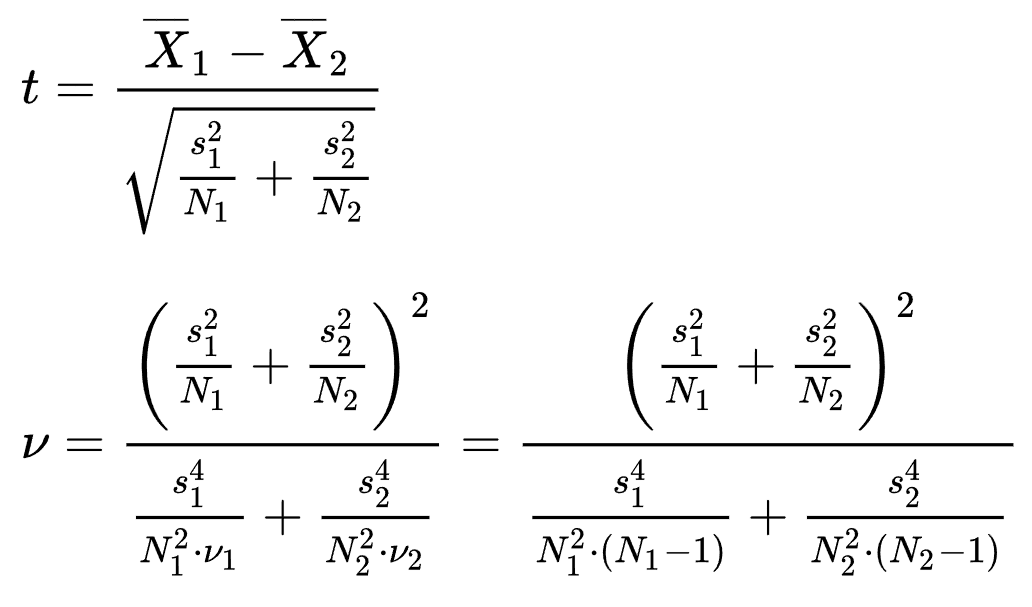

**Regla de decisión**: Definido el nivel de significancia en 0.05, se rechazará la hipótesis nula si el p-valor no supera el umbral de significancia. 


### P-valor

In [ ]:
st.ttest_ind(groupA, groupB, 0, False)

Ttest_indResult(statistic=7.597438801216719, pvalue=6.217970550887654e-14)

Dado que el p-valor es menor al nivel de significancia fijado en la formulación del test, se decide rechazar la hipótesis nula concluyendo que el salario medio de los hombres es distinto al salario medio del resto de géneros

### Potencia del test

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:

p_8 = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.8, ratio=ratio)
p_9 = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.9, ratio=ratio)
p_95 = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.95, ratio=ratio)

print("Tamaño de muestra para potencia 0.8 y significancia 0.05:  {:.2f}".format(p_8))
print("Tamaño de muestra para potencia 0.9 y significancia 0.05: {:.2f}".format(p_9))
print("Tamaño de muestra para potencia 0.95 y significancia 0.05: {:.2f}".format(p_95))

Tamaño de muestra para potencia 0.8 y significancia 0.05:  516.68
Tamaño de muestra para potencia 0.9 y significancia 0.05: 691.13
Tamaño de muestra para potencia 0.95 y significancia 0.05: 854.35


La potencia del test es la probabilidad rechazar la hipótesis nula cuando esta es falsa, es decir, la probabilidad de no cometer el error tipo 2. 

A partir de los tamaños de muestras calculados para las diferentes potencias, concluimos que el tamaño de muestra es lo suficientemente grande. Sin embargo, esta conclusión no implica que la muestra realizada sea significativa de la población, definiendo a la población como el conjunto de profesionales que viven en Argentina y trabajan en el sector IT. Al desconocer el criterio que se utilizó para difundir la encuesta, no es posible afirmar que la muestra es realmente significativa. 
En caso de que la muestra sea significativa, se podría analizar la diferencia del salario medio entre hombres y otros géneros para una empresa en particular y determinar si se encuentra dentro de intervalo de confianza calculado. Si la diferencia supera el limite superior, entonces esto indicaría que la empresa favorece a hombres respecto a otros géneros en comparación a la diferencia a nivel poblacional. 

## Resolución ejercicio 3

Reimportamos funciones y módulos necesarios de la Parte 1